In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
import common

try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

# Datasets

In [87]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'
PENGUINS_DATA_CSV = DATA / 'penguins.csv'

In [14]:
murder_rate_df = pd.read_csv(STATE_CSV)
murder_rate_df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


# Measure of central tendency

In [10]:
murder_rate_df.Population.mean() # using pandas

6162876.3

In [12]:
np.mean(murder_rate_df['Population']) # using numpy

6162876.3

In [16]:
from scipy.stats import trim_mean

trim_mean(murder_rate_df['Population'], 0.1)

4783697.125

In [17]:
murder_rate_df.Population.median()

4436369.5

In [19]:
# weighted mean

np.average(murder_rate_df['Murder.Rate'], weights=murder_rate_df['Population'])

4.445833981123393

In [22]:
# weighted median
wquantiles.median(murder_rate_df['Murder.Rate'], weights= murder_rate_df['Population'])

4.4

# Measure of variability

In [24]:
murder_rate_df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [25]:
murder_rate_df.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [26]:
murder_rate_df.Population.std()

6848235.347401142

In [27]:
IQR = murder_rate_df.Population.quantile(0.75) - murder_rate_df.Population.quantile(0.25)
print(IQR)

4847308.0


In [28]:
robust.scale.mad(murder_rate_df['Population'])

3849876.1459979336

# Exploring the Data Distribution

In [29]:
# box plot and percentiles

murder_rate_df['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (in millions)')

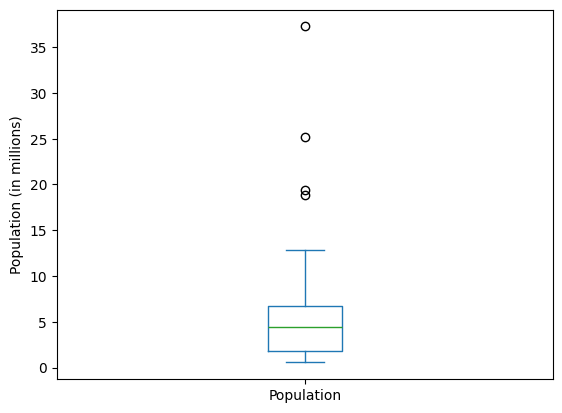

In [31]:
# basic boxplot using pandas

ax = (murder_rate_df['Population']/ 1000000).plot.box()
ax.set_ylabel("Population (in millions)")

From boxplot,
* median population is around 5 million
* Half of the states fall between 2 and 7 million
* here dashed line (whisker) goes from 25th and 75th percentiles to 1.5 * IQR.
* so anything falling outside whiskers in outlier.

# Frequency Tables and Histograms

In [33]:
# Frequency Tables and Histograms

population_bins = pd.cut(murder_rate_df.Population,10)
population_bins.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population in Millions')

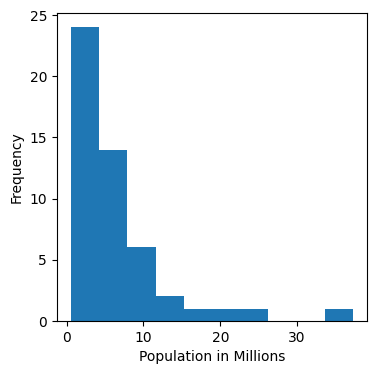

In [34]:
ax = (murder_rate_df['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Population in Millions")

## Denisity plots

Text(0.5, 0, 'Murder Rate (per 100k population)')

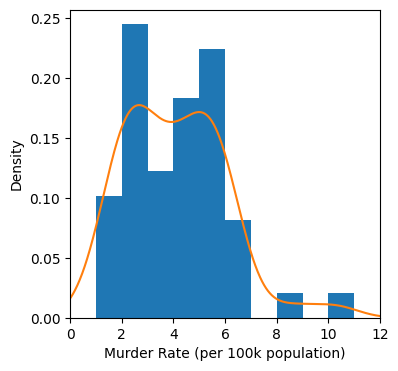

In [35]:
ax = (murder_rate_df['Murder.Rate']).plot.hist(density=True,xlim=[0,12],bins=range(1,12),figsize=(4,4))
(murder_rate_df['Murder.Rate']).plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100k population)")

<Axes: ylabel='Frequency'>

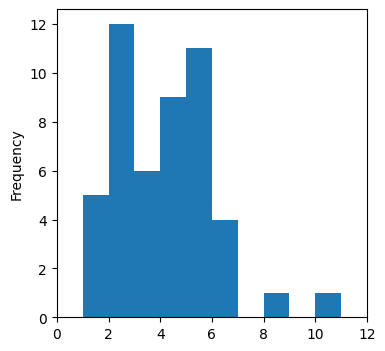

In [38]:
(murder_rate_df['Murder.Rate']).plot.hist(figsize=(4,4),xlim=[0,12],bins=range(1,12))

Notice the label on Y Axis for Histogram vs Density plot (range Too)

# Exploring Binary and Categorical Data

In [40]:
airport_delays_df = pd.read_csv(AIRPORT_DELAYS_CSV)
airport_delays_df

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [42]:
(airport_delays_df/ airport_delays_df.values.sum())*100 # share of delay by causes

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


In [43]:
airport_delays_df.T

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


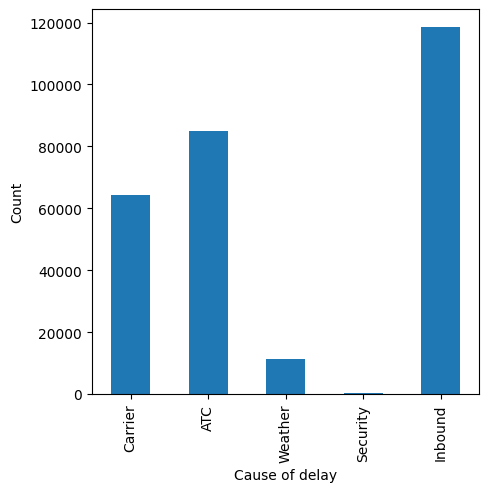

In [47]:
ax = airport_delays_df.T.plot.bar(figsize=(5,5), legend=False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

airport_delays_df.T
plt.show()

# Correlation

In [50]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [51]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [52]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [53]:
telecom_companies_symbols = sp500_sym[sp500_sym['sector']=='telecommunications_services']['symbol']
telecom_companies = sp500_px.loc[sp500_px.index >='2012-07-01', telecom_companies_symbols]
telecom_companies.head()

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


## Correlation matrix

In [54]:
telecom_companies.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


<Axes: >

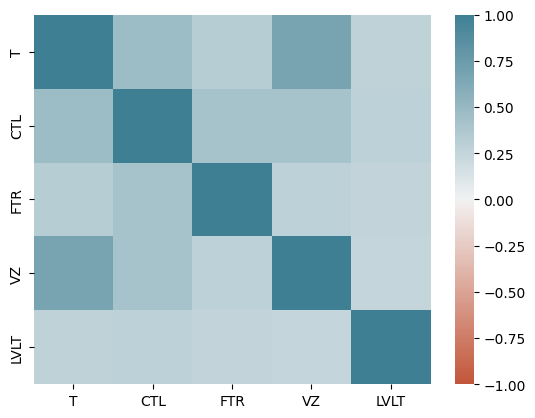

In [57]:
sns.heatmap(telecom_companies.corr(),  cmap=sns.diverging_palette(20, 220, as_cmap=True),  vmin=-1, vmax=1)

## Scatterplots

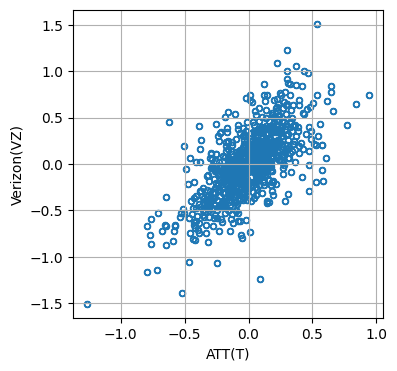

In [60]:
telecom_companies.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
plt.xlabel("ATT(T)")
plt.ylabel("Verizon(VZ)")

plt.grid()
plt.show()

# Exploring Two or More Variables

In [62]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [64]:
# clean tax data
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

kc_tax0.head()

(432693, 3)


,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


## Hexagonal Binning and Contours

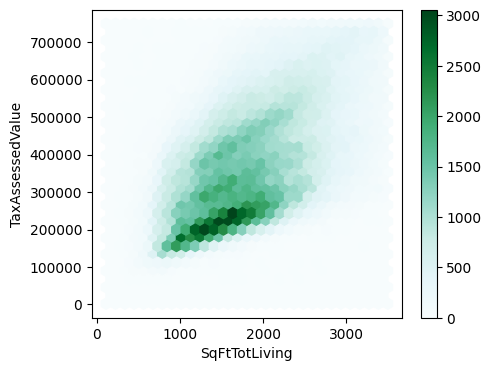

In [65]:
kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5, 4))
plt.xlabel('SqFtTotLiving')
plt.ylabel('TaxAssessedValue')
plt.show()

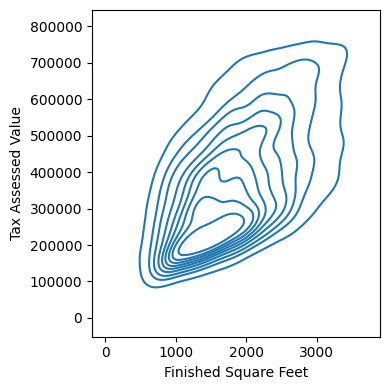

In [66]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## Two Categorical Variables

In [67]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [69]:
pd.crosstab(lc_loans['grade'], lc_loans['status'])

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


In [70]:
# using pivot table

crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [75]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0) * 100
df['All'] = df['All'] / sum(df['All']) * 100
df

C:\Users\hemch\AppData\Local\Temp\ipykernel_15396\1164809192.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.15477997  4.0054393   4.98283351  6.74098308  8.16572808 11.82579045
 12.61956186]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0) * 100
C:\Users\hemch\AppData\Local\Temp\ipykernel_15396\1164809192.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[69.04538557 70.90126162 73.57021717 71.73283789 70.79358694 65.43707378
 61.40080222]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0) * 100
C:\Users\hemch\AppData\Local\Temp\ipykernel_15396\1164809192.py:2: FutureWarning: Setting 

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,2.154780,69.045386,28.152849,0.646986,16.074561
B,4.005439,70.901262,23.540077,1.553222,29.352871
C,4.982834,73.570217,19.149535,2.297415,26.803870
D,6.740983,71.732838,18.418891,3.107288,16.470826
E,8.165728,70.793587,17.092863,3.947822,7.717741
F,11.825790,65.437074,18.040918,4.696218,2.861445
G,12.619562,61.400802,19.839556,6.140080,0.718687


## Categorical vs Numerical data

In [77]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


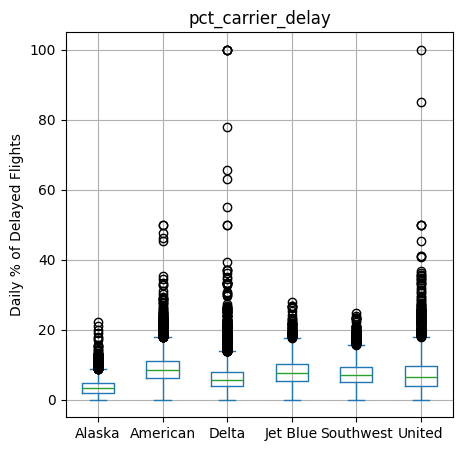

In [82]:
airline_stats.plot.box(by='airline', column='pct_carrier_delay', figsize=(5, 5))
plt.xlabel('')
plt.ylabel('Daily % of Delayed Flights')
plt.suptitle('')
plt.grid()
plt.show()

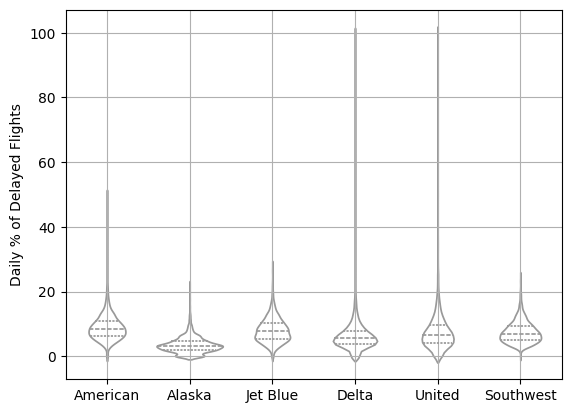

In [84]:
# lets do a violin plot using sns
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', inner='quartile', color='white')
plt.xlabel('')
plt.ylabel('Daily % of Delayed Flights')
plt.suptitle('')
plt.grid()
plt.show()

## Visualizing Multiple Variables

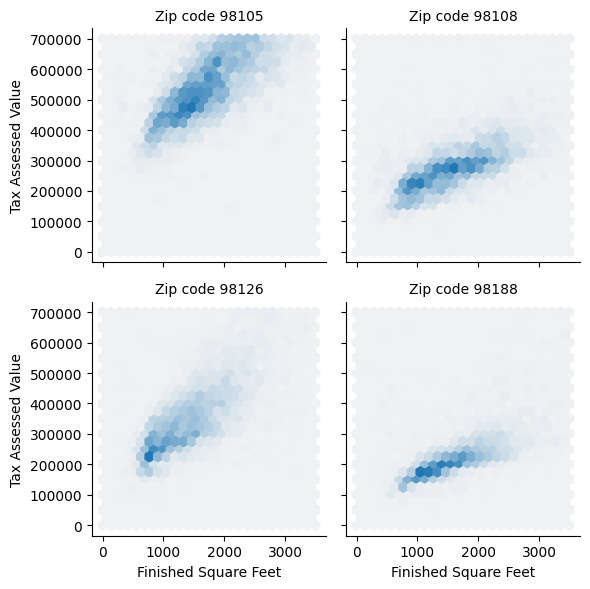

In [85]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

In [88]:
# pair plots

penguins = pd.read_csv(PENGUINS_DATA_CSV)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


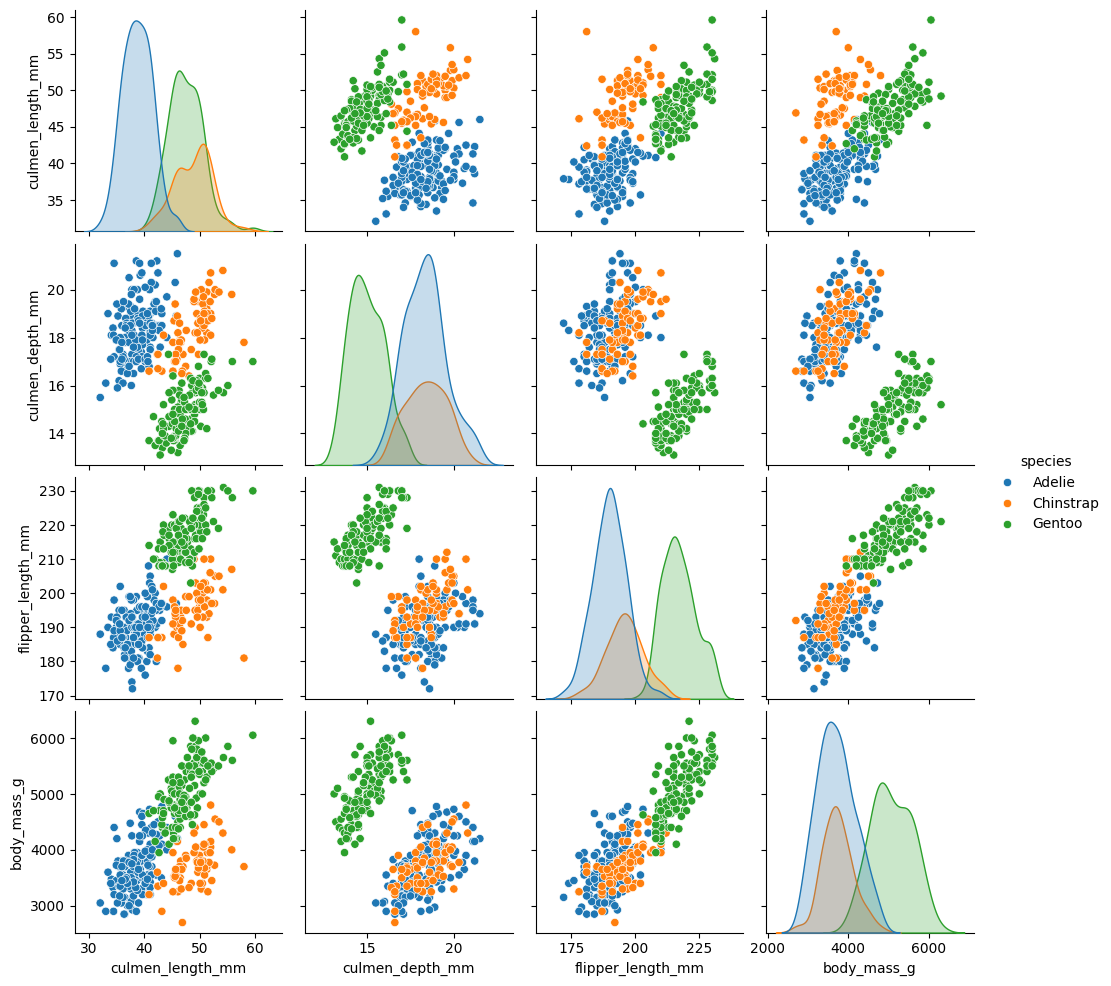

In [90]:
sns.pairplot(penguins, hue='species')